#### Data Source : https://www.kaggle.com/datasets/bryanb/aiml-salaries/code

# Installations

In [47]:
#pip install dython

In [48]:
#pip install association-metrics

# Importing Library

In [49]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import association_metrics as am
from scipy.stats import chi2_contingency
from dython.nominal import associations
from scipy import stats
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings( "ignore" )
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import pylab 
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.ensemble import RandomForestRegressor

# Reading Data from CSV File

In [50]:
df = pd.read_csv('salaries.csv')
df.shape

(1195, 11)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1195 non-null   int64 
 1   experience_level    1195 non-null   object
 2   employment_type     1195 non-null   object
 3   job_title           1195 non-null   object
 4   salary              1195 non-null   int64 
 5   salary_currency     1195 non-null   object
 6   salary_in_usd       1195 non-null   int64 
 7   employee_residence  1195 non-null   object
 8   remote_ratio        1195 non-null   int64 
 9   company_location    1195 non-null   object
 10  company_size        1195 non-null   object
dtypes: int64(4), object(7)
memory usage: 102.8+ KB


# Data Description

In [52]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1195.000000,1.195000e+03,1195.000000,1195.000000
mean,2021.684519,2.495210e+05,122041.142259,66.736402
std,0.584604,1.136720e+06,66487.800833,44.035085
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2021.000000,8.000000e+04,73961.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.755500e+05,160237.500000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [53]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [54]:
df.describe(include='O')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,1195,1195,1195,1195,1195,1195,1195
unique,4,4,63,18,64,59,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,702,1170,310,892,795,823,774


In [55]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


# Plotting Graphs for Visualisation

In [56]:
fig = px.box(df, x="experience_level", y="salary_in_usd")
fig.show()

#### Analysis :
    
    We can observe from the plot that Median salary of Excutives is highest and median salary of Entry level executives are lowest.

In [57]:
fig = px.box(df, x="employment_type", y="salary_in_usd")
fig.show()

#### Analysis :
    
    We can observe from the plot that median salary of the Full time emploee is highest and median salary of Part time 
    employee is the lowest.
    we can also observe that 50 percent of the people gets paid more than $ 120k when they are full time employed.

In [58]:
fig = px.box(df, x="company_size", y="salary_in_usd")
fig.show()

### Analysis :
    We can observe from the plot that median salary of Mid Size company is highest among all the companies and 
    median salary of
    small size company is lowest. Also we can observe that first 50 % employee in mid size company 
    gets paid between below $ 109.5 K 
    whereas in Large company first 50 % of employee gets paid below 103k.

In [59]:
fig = px.box(df, x="remote_ratio", y="salary_in_usd")
fig.show()

In [60]:
fig = px.pie(df_2020,names='remote_ratio',title="Remote Ratio in the year 2020")
fig.show()

In [61]:
fig = px.pie(df_2021,names='remote_ratio', title="Remote Ratio in the year 2021")
fig.show()

In [62]:
fig = px.pie(df_2022,names='remote_ratio',title="Remote Ratio in the year 2022")
fig.show()

### Analysis : 
    
    After analyzing above pie charts we can say that in 2022 more people opted for remote work around 63.9 %. 
    Also in 2022 work from office trend is lowesr 4.59 %.

In [63]:
fig = px.pie(df,names='company_size',title="Company sizes data distribution")
fig.show()

### Analysis:
    We can observe from the plot that most of the companies 64.8 % are mid size, followed by large size 25.9 % and 
    small size compnay percentage is 9.29 %.

In [64]:
fig = px.pie(df,names='experience_level',title="Experience Level data distribution")
fig.show()

### Analysis :
    We can observe from the plot that most are employeed are Senior Level 58.7 %, followed by mid level 26.3 %, 
    entry level 11.5 %, excutive level 3.43%

In [65]:
fig = px.pie(df,names='employment_type',title="Experience Level data distribution")
fig.show()

### Analysis :
    We can observe from the plot that most of employees are in Full time mode 97.9%3

In [66]:
fig = px.pie(df,names='work_year',title="Work Year data distribution")
fig.show()

In [67]:
salary_mean = df.groupby('employee_residence').salary_in_usd.agg('mean')
salary_mean = round(salary_mean)
salary_mean=salary_mean.to_dict()
salary_mean

{'AE': 100000.0,
 'AR': 52667.0,
 'AT': 69426.0,
 'AU': 83786.0,
 'AX': 2324.0,
 'BE': 77056.0,
 'BG': 80000.0,
 'BO': 52500.0,
 'BR': 38263.0,
 'CA': 103937.0,
 'CH': 120334.0,
 'CL': 72519.0,
 'CN': 43331.0,
 'CO': 21844.0,
 'CR': 20000.0,
 'CZ': 37574.0,
 'DE': 83626.0,
 'DK': 31193.0,
 'DO': 110000.0,
 'DZ': 100000.0,
 'EE': 31697.0,
 'EG': 22800.0,
 'ES': 59769.0,
 'FI': 63395.0,
 'FR': 54736.0,
 'GB': 83608.0,
 'GR': 58180.0,
 'HK': 66022.0,
 'HN': 20000.0,
 'HR': 45618.0,
 'HU': 35997.0,
 'ID': 15000.0,
 'IE': 68678.0,
 'IN': 34202.0,
 'IQ': 100000.0,
 'IR': 4000.0,
 'IT': 61600.0,
 'JE': 100000.0,
 'JP': 103538.0,
 'KE': 9272.0,
 'LU': 59102.0,
 'MD': 18000.0,
 'MT': 28369.0,
 'MX': 18185.0,
 'MY': 200000.0,
 'NG': 86667.0,
 'NL': 72182.0,
 'NZ': 125000.0,
 'PH': 47880.0,
 'PK': 27088.0,
 'PL': 55713.0,
 'PR': 166000.0,
 'PT': 43720.0,
 'RO': 51419.0,
 'RS': 25532.0,
 'RU': 105750.0,
 'SG': 91182.0,
 'SI': 63831.0,
 'TH': 15000.0,
 'TN': 30641.0,
 'TR': 19058.0,
 'UA': 13400.0,

In [68]:
salary_mean1=pd.DataFrame(list(salary_mean.items()),columns=['employee_residence','Avg_salary'])
salary_mean1

,employee_residence,Avg_salary
0,AE,100000.0
1,AR,52667.0
2,AT,69426.0
3,AU,83786.0
4,AX,2324.0
...,...,...
59,TN,30641.0
60,TR,19058.0
61,UA,13400.0
62,US,149225.0


In [69]:
fig = px.bar(salary_mean1,x='employee_residence',y='Avg_salary')
fig.show()

### Analysis : 
    We can observe from the plot that in Malaysia the average salary is highest, followed by PR and US.

In [70]:
salary_mean2 = df.groupby('company_location').salary_in_usd.agg('mean')
salary_mean2 = round(salary_mean2)
salary_mean2=salary_mean2.to_dict()
salary_mean2

{'AE': 100000.0,
 'AL': 2324.0,
 'AR': 50000.0,
 'AS': 34026.0,
 'AT': 67834.0,
 'AU': 83786.0,
 'BE': 77056.0,
 'BO': 7500.0,
 'BR': 12062.0,
 'CA': 105972.0,
 'CH': 63108.0,
 'CL': 40038.0,
 'CN': 71666.0,
 'CO': 21844.0,
 'CZ': 35263.0,
 'DE': 79737.0,
 'DK': 45558.0,
 'DZ': 100000.0,
 'EE': 31697.0,
 'EG': 22800.0,
 'ES': 50494.0,
 'FI': 63395.0,
 'FR': 61576.0,
 'GB': 83557.0,
 'GR': 55048.0,
 'HN': 20000.0,
 'HR': 45618.0,
 'HU': 35735.0,
 'ID': 34526.0,
 'IE': 68678.0,
 'IL': 119059.0,
 'IN': 26105.0,
 'IQ': 100000.0,
 'IR': 4000.0,
 'IT': 36366.0,
 'JP': 114127.0,
 'KE': 9272.0,
 'LU': 43943.0,
 'MD': 18000.0,
 'MT': 28369.0,
 'MX': 32123.0,
 'MY': 40000.0,
 'NG': 86667.0,
 'NL': 70758.0,
 'NZ': 125000.0,
 'PH': 50000.0,
 'PK': 13333.0,
 'PL': 65618.0,
 'PR': 167500.0,
 'PT': 47438.0,
 'RO': 60000.0,
 'RU': 157500.0,
 'SG': 54163.0,
 'SI': 63831.0,
 'TH': 15000.0,
 'TR': 19058.0,
 'UA': 13400.0,
 'US': 146649.0,
 'VN': 4000.0}

In [71]:
salary_mean2=pd.DataFrame(list(salary_mean2.items()),columns=['company_location','Avg_salary'])
salary_mean2

,company_location,Avg_salary
0,AE,100000.0
1,AL,2324.0
2,AR,50000.0
3,AS,34026.0
4,AT,67834.0
5,AU,83786.0
6,BE,77056.0
7,BO,7500.0
8,BR,12062.0
9,CA,105972.0


In [72]:
fig = px.bar(salary_mean2,x='company_location',y='Avg_salary')
fig.show()

### Analysis :
    We can observe from the plot that companies from PR pays the highest on average, followed by RU and US,

# Checking for Null Value

In [73]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Checking for Duplicates

In [74]:
df.duplicated().value_counts()

False    971
True     224
dtype: int64

### Statistical Tests

#### Correlation Between Numerical Variables

In [75]:
corrs = df.corr()

fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation among Numerical Variables',  
                 plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                        font=dict(color='#8a8d93'))

## Cramers V - Assocation between Categorical Variables

In [76]:
df = df.apply(
    lambda x : x.astype('category') if x.dtype == 'O' else x
)

cramers_v = am.CramersV(df)

cfit = cramers_v.fit().round(2)
cfit

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
experience_level,1.00,0.13,0.41,0.30,0.41,0.40,0.24
employment_type,0.13,1.00,0.36,0.21,0.46,0.39,0.08
job_title,0.41,0.36,1.00,0.30,0.30,0.30,0.39
salary_currency,0.30,0.21,0.30,1.00,0.87,0.82,0.29
employee_residence,0.41,0.46,0.30,0.87,1.00,0.87,0.45
company_location,0.40,0.39,0.30,0.82,0.87,1.00,0.41
company_size,0.24,0.08,0.39,0.29,0.45,0.41,1.00


In [77]:
categorical_cols = df.select_dtypes(exclude = np.number).columns.tolist()
numerical_cols = df.select_dtypes(include = np.number).columns.tolist()

In [78]:
length= len(categorical_cols)

## T - Test

## Performing One-Saqmple T-Test

In [79]:
df_2022 = df[df["work_year"] == 2022]

In [80]:
df_2022_salary=df_2022['salary_in_usd']
df_2022_salary.head()

0    200000
1     74378
2    165000
3     33599
4    185900
Name: salary_in_usd, dtype: int64

In [81]:
df_2022_salary.describe()

count       893.000000
mean     130670.145577
std       58478.894415
min        2324.000000
25%       87110.000000
50%      131300.000000
75%      170000.000000
max      405000.000000
Name: salary_in_usd, dtype: float64

In [82]:
print(df_2022_salary.sample(5))

326    191475
174    145300
61     156400
332    105724
796    109280
Name: salary_in_usd, dtype: int64


In [83]:
print(stats.ttest_1samp(a=df_2022_salary, popmean=120000,alternative='greater'))

Ttest_1sampResult(statistic=5.452515649851013, pvalue=3.2156684795567265e-08)


#### T-Test Hypothesis

H0: The mean of Salary for the year 2022 is less than or equal to $ 120000

H1: The mean of Salary for the year 2022 is greater than $ 120000

Analyzing the one-sample t-test, it finds out if the hypothesized mean is similar to or different from the group’s mean. From the example above, we’ve selected the Salary of the year 2022 as the population sample to perform the test on.

From the test, since the p-value could not beat the alpha level set at 0.05, we reject the null hypothesis.

Moreover, if we check, the p-value is very close to 0, which means that the mean of Salary is most likely greater than $120000.


In [84]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [85]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [86]:
df_2020 = df[df["work_year"] == 2020]

In [87]:
df_2020.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
552,2020,EN,FT,Data Engineer,1000000,INR,13493,IN,100,IN,L
553,2020,EN,FT,Data Engineer,1000000,INR,13493,IN,100,IN,L
571,2020,EN,FT,Data Analyst,20000,EUR,22809,PT,100,PT,M
596,2020,EN,FT,Data Scientist,43200,EUR,49268,DE,0,DE,S
852,2020,SE,FT,Machine Learning Manager,157000,CAD,117104,CA,50,CA,L


In [88]:
df_2021 = df[df["work_year"] == 2021]

In [89]:
df_2021.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
8,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L
9,2021,MI,FT,Data Engineer,100000,AUD,75050,AU,50,AU,L
129,2021,EN,FT,Data Analyst,56000,AUD,42028,AU,50,AU,L
249,2021,EN,FT,Machine Learning Research Engineer,20000,USD,20000,FR,50,FR,M
264,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L


In [90]:
df_2020[['salary_in_usd']]

,salary_in_usd
552,13493
553,13493
571,22809
596,49268
852,117104
...,...
1183,130800
1184,45618
1190,412000
1192,105000


In [91]:
df_2020_salary=df_2020['salary_in_usd']
df_2020_salary.head()

552     13493
553     13493
571     22809
596     49268
852    117104
Name: salary_in_usd, dtype: int64

In [92]:
df_2020_salary.describe()

count        75.000000
mean      92644.413333
std       82631.414380
min        5707.000000
25%       42764.000000
50%       72000.000000
75%      114523.500000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [93]:
df_2021_salary=df_2021[['salary_in_usd']]
df_2021_salary.head()


,salary_in_usd
8,5409
9,75050
129,42028
249,20000
264,15000


In [94]:
df_2021_salary.describe()

,salary_in_usd
count,227.000000
mean,97807.903084
std,80317.553794
min,2859.000000
25%,46703.000000
50%,80000.000000
75%,132513.000000
max,600000.000000


In [95]:
df_2022=df[df["work_year"] == 2022]
df_2022.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [96]:
df_2022_salary=df_2022['salary_in_usd']
df_2022_salary.head()

0    200000
1     74378
2    165000
3     33599
4    185900
Name: salary_in_usd, dtype: int64

In [97]:
df_2022_salary.describe()

count       893.000000
mean     130670.145577
std       58478.894415
min        2324.000000
25%       87110.000000
50%      131300.000000
75%      170000.000000
max      405000.000000
Name: salary_in_usd, dtype: float64

## Independent Sample T Test : with salary of 2020 and 2021

In [98]:
print(stats.ttest_ind(a=df_2020_salary, b=df_2021_salary, equal_var=False,alternative='greater'))

Ttest_indResult(statistic=array([-0.47242917]), pvalue=array([0.68127277]))


#### Independent Sample T test hypothesis
H0: The mean of 2020 salary is less than or equal to the mean of 2021 salary

H1: The mean of 2020 salary is greater than the mean of 2021 salary.

Our p-value (p=0.68127277) is greater than alpha = 0.05.

However, interpreting any form of t-test largely depends on the p-value, the result above explains that The mean of 2020 salary
is less than or equal to the mean of 2021 salary.

Therefore we will Accept the null hypothesis which says that The mean of 2020 salaryis less than or equal to the mean of 2021 salary.


## Independent Sample T Test : with salary of 2021 and 2022

In [99]:
print(stats.ttest_ind(a=df_2021_salary, b=df_2022_salary, equal_var=False,alternative='greater'))

Ttest_indResult(statistic=array([-5.7869295]), pvalue=array([0.99999999]))


#### Independent Sample T test hypothesis:
    
H0: The mean of 2021 salary is less than or equal to the mean of 2022 salary

H1: The mean of 2021 salary is greater than the mean of 2022 salary.

Our p-value (p=0.99999999) is greater than alpha = 0.05.

However, interpreting any form of t-test largely depends on the p-value, the result above explains that The mean of 2021 salary is less than or equal to the mean of 2022 salary.

Therefore we will Accept the null hypothesis which says that The mean of 2021 salaryis less than or equal to the mean of 2022 salary.

## ANOVA Test 1 : using different employment types


In [100]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [101]:
df['employment_type'].nunique()

4

In [102]:
print(df['employment_type'])

0       FT
1       FT
2       FT
3       FT
4       FT
        ..
1190    FT
1191    FT
1192    FT
1193    CT
1194    FT
Name: employment_type, Length: 1195, dtype: category
Categories (4, object): ['CT', 'FL', 'FT', 'PT']


In [103]:
df_ct=df[df["employment_type"] == 'CT']
df_ct.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2022,SE,CT,Data Analyst,90000,USD,90000,US,100,US,M
235,2022,MI,CT,NLP Engineer,60000,USD,60000,IN,100,US,S
363,2022,MI,CT,Analytics Engineer,7500,USD,7500,BO,50,BO,M
890,2022,EN,CT,Applied Machine Learning Scientist,29000,EUR,30641,TN,100,CZ,M
972,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L


In [104]:
df_ct_salary=df_ct['salary_in_usd']
df_ct_salary.head()

115     90000
235     60000
363      7500
890     30641
972    270000
Name: salary_in_usd, dtype: int64

In [105]:
df_fl=df[df["employment_type"] == 'FL']
df_fl.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
507,2022,MI,FL,Applied Machine Learning Scientist,2400000,INR,30886,IN,100,IN,S
913,2022,MI,FL,Data Scientist,100000,USD,100000,CA,100,US,M
1134,2021,MI,FL,Data Engineer,20000,USD,20000,IT,0,US,L
1155,2021,MI,FL,Machine Learning Scientist,12000,USD,12000,PK,50,PK,M
1160,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,RU,100,US,S


In [106]:
df_fl_salary=df_fl['salary_in_usd']
df_fl_salary.head()

507      30886
913     100000
1134     20000
1155     12000
1160     60000
Name: salary_in_usd, dtype: int64

In [107]:
df_ft=df[df["employment_type"] == 'FT']
df_ft.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [108]:
df_ft_salary=df_2022['salary_in_usd']
df_ft_salary.head()

0    200000
1     74378
2    165000
3     33599
4    185900
Name: salary_in_usd, dtype: int64

In [109]:
df_pt=df[df["employment_type"] == 'PT']
df_pt.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
353,2021,EN,PT,Computer Vision Software Engineer,120000,DKK,19073,DK,50,DK,L
400,2022,EN,PT,Data Scientist,110000,USD,110000,DO,100,FR,M
859,2022,MI,PT,Data Engineer,50000,EUR,52829,DE,50,DE,L
915,2022,EN,PT,Data Scientist,100000,USD,100000,DZ,50,DZ,M
930,2021,EN,PT,Data Analyst,8760,EUR,10354,ES,50,ES,M


In [110]:
df_pt_salary=df_pt['salary_in_usd']
df_pt_salary.head()

353     19073
400    110000
859     52829
915    100000
930     10354
Name: salary_in_usd, dtype: int64

In [111]:
df_pt_salary.describe()

count        12.000000
mean      38137.500000
std       36471.980492
min        5409.000000
25%       12000.000000
50%       20371.000000
75%       57057.000000
max      110000.000000
Name: salary_in_usd, dtype: float64

In [112]:
df_ft_salary.describe()

count       893.000000
mean     130670.145577
std       58478.894415
min        2324.000000
25%       87110.000000
50%      131300.000000
75%      170000.000000
max      405000.000000
Name: salary_in_usd, dtype: float64

In [113]:
df_fl_salary.describe()

count         5.000000
mean      44577.200000
std       35924.612722
min       12000.000000
25%       20000.000000
50%       30886.000000
75%       60000.000000
max      100000.000000
Name: salary_in_usd, dtype: float64

In [114]:
df_ct_salary.describe()

count         8.000000
mean     134892.625000
std      138413.437955
min        7500.000000
25%       52660.250000
50%       95000.000000
75%      146250.000000
max      416000.000000
Name: salary_in_usd, dtype: float64

In [115]:
print(f_oneway(df_pt_salary, df_ft_salary, df_fl_salary,df_ct_salary))

F_onewayResult(statistic=13.07109737866644, pvalue=2.3072194076598743e-08)


### Interpretation:
Since our p-value (2.3072194076598743e-08) is far less than alpha (0.05), we dismiss the null hypothesis, as there exists no evidence sustainable enough to accept it.

This means that the sample means are very different. Meaning that our H1 (alternate hypothesis) is true.

### ANOVA Test 2 :  Usingh diffrent company sizes

In [116]:
print(df['company_size'])

0       S
1       L
2       S
3       L
4       M
       ..
1190    L
1191    L
1192    S
1193    L
1194    L
Name: company_size, Length: 1195, dtype: category
Categories (3, object): ['L', 'M', 'S']


In [117]:
df_L=df[df["company_size"] == 'L']
df_L.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
8,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L
9,2021,MI,FT,Data Engineer,100000,AUD,75050,AU,50,AU,L
19,2022,SE,FT,Product Data Scientist,8000,USD,8000,IN,100,SG,L


In [118]:
df_L_salary=df_L['salary_in_usd']

In [119]:
df_L_salary.describe()

count       310.000000
mean     118304.454839
std       78067.370104
min        2324.000000
25%       62711.250000
50%      109500.000000
75%      157900.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [120]:
df_M=df[df["company_size"] == 'M']
df_M.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M
5,2022,SE,FT,Data Engineer,129300,USD,129300,US,0,US,M
6,2022,SE,FT,Data Analyst,169000,USD,169000,US,0,US,M
7,2022,SE,FT,Data Analyst,110600,USD,110600,US,0,US,M
10,2022,SE,FT,Data Engineer,225000,USD,225000,US,0,US,M


In [121]:
df_M_salary=df_M['salary_in_usd']

In [122]:
df_M_salary.describe()

count       774.000000
mean     129537.630491
std       59306.885236
min        4000.000000
25%       87110.000000
50%      130000.000000
75%      170000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [123]:
df_S=df[df["company_size"] == 'S']
df_S.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
18,2022,EN,FT,Machine Learning Engineer,108000,USD,108000,US,0,US,S
40,2022,SE,FT,Data Scientist,120000,USD,120000,US,100,US,S
41,2022,SE,FT,Data Scientist,55000,USD,55000,US,100,US,S


In [124]:
df_S_salary=df_S['salary_in_usd']

In [125]:
df_S_salary.describe()

count       111.000000
mean      80204.126126
std       62815.312376
min        2859.000000
25%       45828.000000
50%       63711.000000
75%      104080.000000
max      416000.000000
Name: salary_in_usd, dtype: float64

In [126]:
print(f_oneway(df_S_salary, df_M_salary, df_L_salary))

F_onewayResult(statistic=28.652839891190567, pvalue=7.016078145574956e-13)


### Interpretation:
Since our p-value (7.016078145574956e-13) is far less than alpha (0.05), we dismiss the null hypothesis, as there exists no evidence sustainable enough to accept it.

This means that the sample means are very different. Meaning that our H1 (alternate hypothesis) is true.

# Dropping salary & salary_currency column because they have been converted to salary_in_usd

In [127]:
df.drop(['salary','salary_currency'],axis=1,inplace=True)

### Encoding the Catergorical Variables :

In [128]:
for i in df.columns:
    a = df.groupby(i).salary_in_usd.agg('mean')
    print(a)

work_year
2020     92644.413333
2021     97807.903084
2022    130670.145577
Name: salary_in_usd, dtype: float64
experience_level
EN     58445.355072
EX    195607.414634
MI     90290.748408
SE    144448.015670
Name: salary_in_usd, dtype: float64
employment_type
CT    134892.625000
FL     44577.200000
FT    123144.861538
PT     38137.500000
Name: salary_in_usd, dtype: float64
job_title
3D Computer Vision Researcher           3866.500000
AI Scientist                           78977.833333
Analytics Engineer                    140172.918919
Applied Data Scientist                154712.500000
Applied Machine Learning Scientist    114608.888889
                                          ...      
Principal Data Scientist              214342.571429
Product Data Analyst                   55357.333333
Product Data Scientist                  8000.000000
Research Scientist                    108951.400000
Staff Data Scientist                  105000.000000
Name: salary_in_usd, Length: 63, dtype: f

In [129]:
#df.replace({'work_year':{2020:9,2021:9,2022:13}})

In [130]:
df['employee_residence'].head()

0    GB
1    CA
2    US
3    GB
4    US
Name: employee_residence, dtype: category
Categories (64, object): ['AE', 'AR', 'AT', 'AU', ..., 'TR', 'UA', 'US', 'VN']

In [131]:
employee_residence_mean = df.groupby('employee_residence').salary_in_usd.agg('mean')/10000
employee_residence_round = round(employee_residence_mean)
employee_residence_round
emp_res = employee_residence_round.to_dict()
df = df.replace({"employee_residence": emp_res})
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,8.0,100,GB,S
1,2022,EN,FT,Data Scientist,74378,10.0,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,15.0,50,US,S
3,2022,EN,FT,Data Scientist,33599,8.0,50,GB,L
4,2022,SE,FT,Data Engineer,185900,15.0,0,US,M


In [132]:
company_location_mean = df.groupby('company_location').salary_in_usd.agg('mean')/10000
company_location_round = round(company_location_mean)
comp_loc = company_location_round.to_dict()
df = df.replace({'company_location': comp_loc})
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,8.0,100,8.0,S
1,2022,EN,FT,Data Scientist,74378,10.0,100,11.0,L
2,2022,SE,FT,Data Science Lead,165000,15.0,50,15.0,S
3,2022,EN,FT,Data Scientist,33599,8.0,50,8.0,L
4,2022,SE,FT,Data Engineer,185900,15.0,0,15.0,M


In [133]:
remote_ratio_mean = df.groupby('remote_ratio').salary_in_usd.agg('mean')/10000
remote_ratio_round = round(remote_ratio_mean)
rem_ratio = remote_ratio_round.to_dict()
df = df.replace({'remote_ratio': rem_ratio})
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,8.0,13,8.0,S
1,2022,EN,FT,Data Scientist,74378,10.0,13,11.0,L
2,2022,SE,FT,Data Science Lead,165000,15.0,8,15.0,S
3,2022,EN,FT,Data Scientist,33599,8.0,8,8.0,L
4,2022,SE,FT,Data Engineer,185900,15.0,13,15.0,M


In [134]:
work_year_mean = df.groupby('work_year').salary_in_usd.agg('mean')/10000
work_year_round = round(work_year_mean)
work_year1 = work_year_round.to_dict()
df = df.replace({'work_year': work_year1})
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,13,SE,FT,Marketing Data Analyst,200000,8.0,13,8.0,S
1,13,EN,FT,Data Scientist,74378,10.0,13,11.0,L
2,13,SE,FT,Data Science Lead,165000,15.0,8,15.0,S
3,13,EN,FT,Data Scientist,33599,8.0,8,8.0,L
4,13,SE,FT,Data Engineer,185900,15.0,13,15.0,M


In [135]:
work_year_mean = df.groupby('work_year').salary_in_usd.agg('mean')/10000
work_year_round = round(work_year_mean)
work_year1 = work_year_round.to_dict()
df = df.replace({'work_year': work_year1})
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,13,SE,FT,Marketing Data Analyst,200000,8.0,13,8.0,S
1,13,EN,FT,Data Scientist,74378,10.0,13,11.0,L
2,13,SE,FT,Data Science Lead,165000,15.0,8,15.0,S
3,13,EN,FT,Data Scientist,33599,8.0,8,8.0,L
4,13,SE,FT,Data Engineer,185900,15.0,13,15.0,M


### Encoding the Categorical variable :

In [136]:
for i in df.columns:
    if (((df[i].dtype)!='int64')):
        work_year_mean = df.groupby(i).salary_in_usd.agg('mean')/10000
        work_year_round = round(work_year_mean)
        work_year1 = work_year_round.to_dict()
        df = df.replace({i: work_year1})


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           1195 non-null   int64   
 1   experience_level    1195 non-null   category
 2   employment_type     1195 non-null   category
 3   job_title           1195 non-null   category
 4   salary_in_usd       1195 non-null   int64   
 5   employee_residence  1195 non-null   category
 6   remote_ratio        1195 non-null   int64   
 7   company_location    1195 non-null   category
 8   company_size        1195 non-null   category
dtypes: category(6), int64(3)
memory usage: 37.7 KB


In [139]:
df['experience_level'] = df['experience_level'].astype('float')
df['employment_type'] = df['employment_type'].astype(int)
df['job_title'] = df['job_title'].astype(int)
df['employee_residence'] = df['employee_residence'].astype(int)
df['company_location'] = df['company_location'].astype(int)
df['company_size'] = df['company_size'].astype(int)
df['remote_ratio'] = df['remote_ratio'].astype(int)

### Correlation 

In [140]:
df.corr()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.316636,0.119390,0.038534,0.223236,0.384413,0.355692,0.334479,0.407599
experience_level,0.316636,1.000000,0.150909,0.266804,0.522912,0.441851,0.226239,0.438777,0.232618
employment_type,0.119390,0.150909,1.000000,0.084576,0.148927,0.164950,0.134831,0.119682,0.102584
job_title,0.038534,0.266804,0.084576,1.000000,0.443334,0.229269,0.060833,0.202179,0.056395
salary_in_usd,0.223236,0.522912,0.148927,0.443334,1.000000,0.627724,0.231354,0.605306,0.213986
employee_residence,0.384413,0.441851,0.164950,0.229269,0.627724,1.000000,0.340377,0.915803,0.302006
remote_ratio,0.355692,0.226239,0.134831,0.060833,0.231354,0.340377,1.000000,0.342056,0.182961
company_location,0.334479,0.438777,0.119682,0.202179,0.605306,0.915803,0.342056,1.000000,0.245957
company_size,0.407599,0.232618,0.102584,0.056395,0.213986,0.302006,0.182961,0.245957,1.000000


In [141]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,13,14.0,12,14,200000,8,13,8,8
1,13,6.0,12,13,74378,10,13,11,12
2,13,14.0,12,16,165000,15,8,15,8
3,13,6.0,12,13,33599,8,8,8,12
4,13,14.0,12,13,185900,15,13,15,13
5,13,14.0,12,13,129300,15,13,15,13
6,13,14.0,12,9,169000,15,13,15,13
7,13,14.0,12,9,110600,15,13,15,13
8,10,6.0,12,1,5409,3,8,3,12
9,10,9.0,12,13,75050,8,8,8,12


In [142]:
df.describe()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,12.179079,11.968201,11.892887,12.394142,122041.142259,12.185774,12.435146,12.435146,12.276151
std,1.428848,3.328068,0.952072,3.052220,66487.800833,4.297243,1.583448,4.165315,1.435045
min,9.000000,6.000000,4.000000,0.000000,2324.000000,0.000000,8.000000,0.000000,8.000000
25%,10.000000,9.000000,12.000000,11.000000,73961.000000,8.000000,13.000000,8.000000,12.000000
50%,13.000000,14.000000,12.000000,13.000000,120000.000000,15.000000,13.000000,15.000000,13.000000
75%,13.000000,14.000000,12.000000,13.000000,160237.500000,15.000000,13.000000,15.000000,13.000000
max,13.000000,20.000000,13.000000,40.000000,600000.000000,20.000000,13.000000,17.000000,13.000000


### The Target Variable Salary is Skewed :

In [143]:
df['salary_in_usd'].skew()

0.9511476886364311

### Plot :

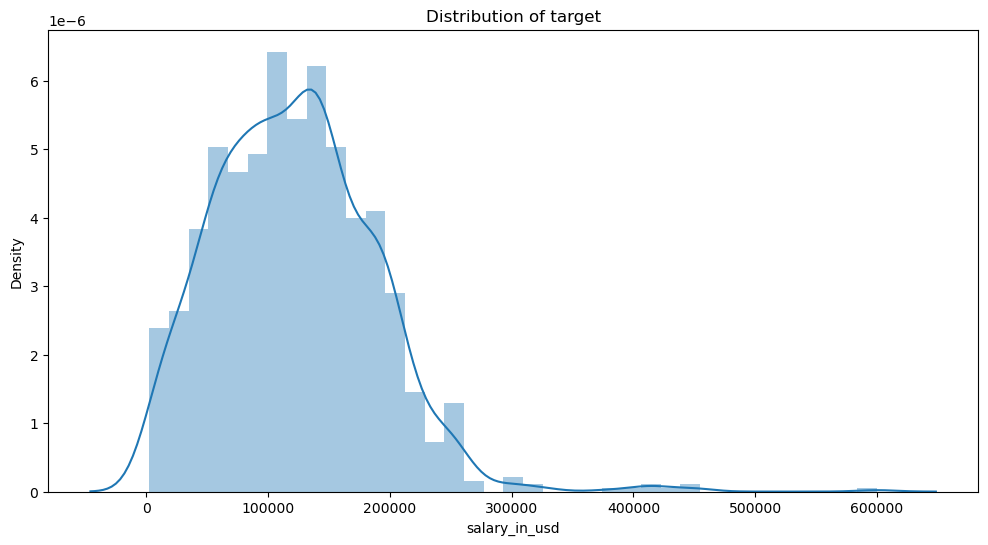

In [144]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of target')
sns.distplot(df['salary_in_usd'])
plt.show()

### Using Box_Cox Transformation :

In [177]:
df['salary_in_usd'] = stats.boxcox(df['salary_in_usd'])[0]

In [178]:
df['salary_in_usd'].skew()

-0.0025121602098067543

### Plot :

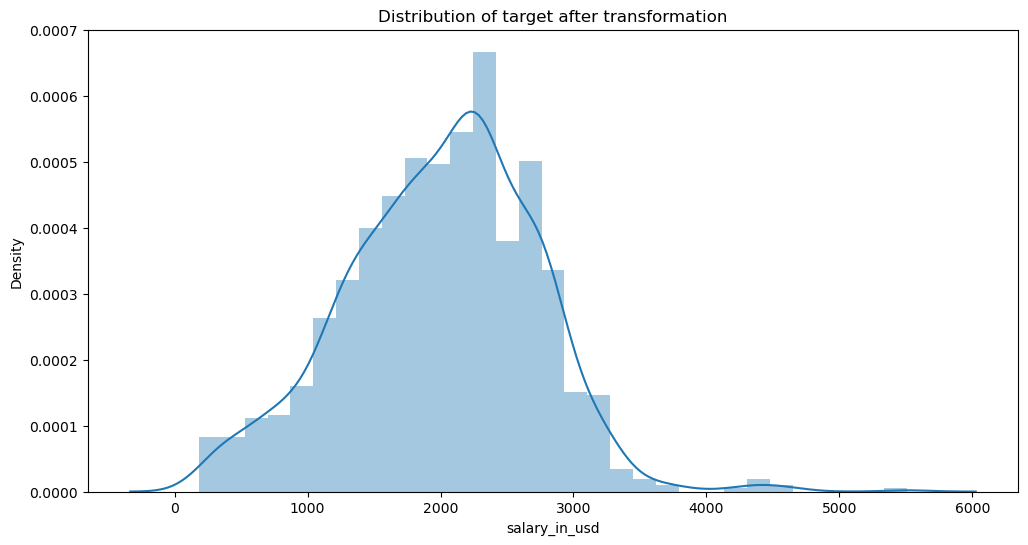

In [147]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of target after transformation')
sns.distplot(df['salary_in_usd'])
plt.show()

### Checking VIF of independent Variables :

In [186]:
b,a = dmatrices('salary_in_usd ~ work_year + experience_level + employment_type + job_title + employee_residence + remote_ratio + company_location + company_size',data=df,return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['variable'] = a.columns

vif

,VIF,variable
0,278.127971,Intercept
1,1.441623,work_year
2,1.371008,experience_level
3,1.054126,employment_type
4,1.107972,job_title
5,6.783522,employee_residence
6,1.232775,remote_ratio
7,6.435534,company_location
8,1.248890,company_size


### We can observe from the result of VIF that company_location and employee_residence has VIF more than 5. Which indicates multi-colinerarity.

### OLS Model

### Building Base Model using all the features :

In [187]:
mod = sm.OLS(b,a)
fii1 = mod.fit()
fii1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     242.4
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          2.49e-243
Time:                        17:25:57   Log-Likelihood:                -8964.4
No. Observations:                1195   AIC:                         1.795e+04
Df Residuals:                    1186   BIC:                         1.799e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -704.3089    212.197     -3.319      0.001   -1120.633    -287.985
work_year            -17.0909     10.696     -1.598      0.110     -38.077       3.895
experience_level      52.5027      4.478     11.723      0.000      43.716      61.289
employment_type       27.3408     13.727      1.992      0.047       0.409      54.273
job_title             58.0963      4.390     13.234      0.000      49.484      66.709
employee_residence    58.5143      7.715      7.584      0.000      43.378      73.651
remote_ratio          -4.2126      8.926     -0.472      0.637     -21.724      13.299
company_location      32.9428      7.753      4.249      0.000      17.733      48.153
company_size          13.6449      9.913      1.376      0.169      -5.804      33.093
==============================================================================
Omnibus:                      119.099   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.050
Skew:                           0.444   Prob(JB):                     2.25e-92
Kurtosis:                       5.773   Cond. No.                         583.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analysis :
    We can observe frot the OLS summary that work_year,remote_ratio and company_size has P value more than 0.05 which means that
    this varible does not have significant relatioship with the target variable salary.

### Residual PLot

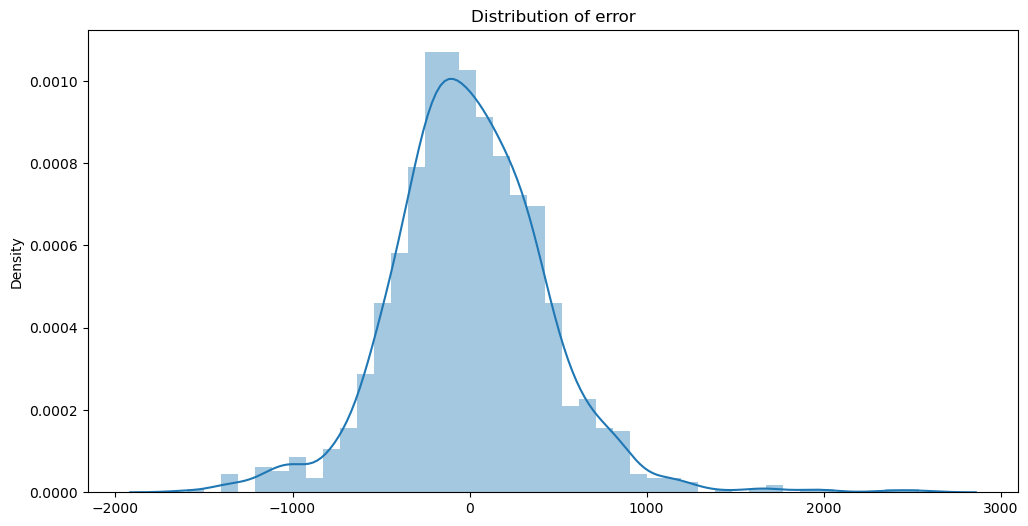

In [188]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fii1.resid)
plt.show()

In [189]:
fii1.resid.skew()

0.4441530272497665

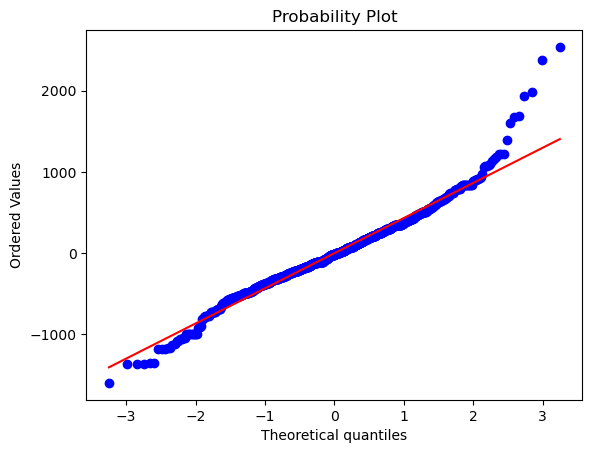

In [195]:
stats.probplot(fii1.resid, dist="norm", plot=pylab)
pylab.show()

In [190]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = sms.het_breuschpagan(fii1.resid, fii1.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 34.41214553235931),
 ('p-value', 3.4201943206078454e-05),
 ('f-value', 4.3957039146445),
 ('f p-value', 2.9795073752617544e-05)]

#### Here we will be building the model dropping work_year,remote_ratio and company_size :

In [191]:
d,c = dmatrices('salary_in_usd ~ experience_level + employment_type + employee_residence+job_title+employee_residence+company_location',data=df,return_type='dataframe')

In [192]:
mod = sm.OLS(d,c)
fii2 = mod.fit()
fii2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     386.7
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          2.84e-246
Time:                        17:26:09   Log-Likelihood:                -8966.4
No. Observations:                1195   AIC:                         1.794e+04
Df Residuals:                    1189   BIC:                         1.798e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -769.8065    166.407     -4.626      0.000   -1096.290    -443.323
experience_level      51.6439      4.384     11.781      0.000      43.043      60.244
employment_type       26.5105     13.674      1.939      0.053      -0.318      53.339
employee_residence    57.7929      7.515      7.690      0.000      43.048      72.537
job_title             58.6394      4.371     13.416      0.000      50.064      67.215
company_location      32.5152      7.682      4.233      0.000      17.444      47.587
==============================================================================
Omnibus:                      125.894   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.486
Skew:                           0.454   Prob(JB):                    9.26e-104
Kurtosis:                       5.950   Cond. No.                         364.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analysis :
    We can observe in the OLS summary that adjusted R square has remained same but employment_type P value has crossed 
    the 0.05 threshold, which means employment_type does not have significant relationship with target Salary.

#### B-P Test

In [193]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = sms.het_breuschpagan(fii2.resid, fii2.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 29.391095927860146),
 ('p-value', 1.9430367732832485e-05),
 ('f-value', 5.996181555603981),
 ('f p-value', 1.7310358808520132e-05)]

### Residual Plot

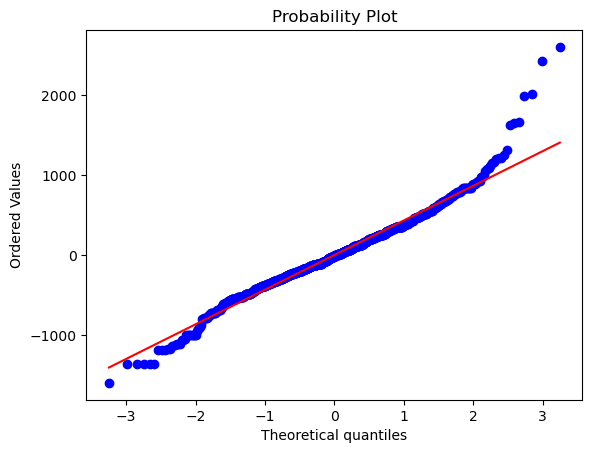

In [194]:
stats.probplot(fii2.resid, dist="norm", plot=pylab)
pylab.show()

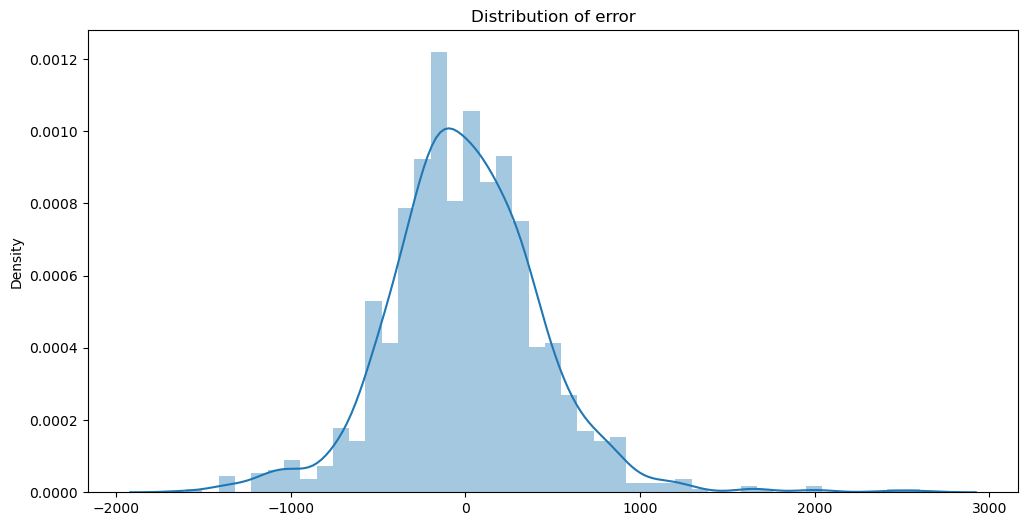

In [200]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fii2.resid)
plt.show()

#### Here we will be building the model dropping emploee_type :

In [196]:
f,e = dmatrices('salary_in_usd ~ experience_level + employee_residence+job_title+employee_residence+company_location',data=df,return_type='dataframe')

In [197]:
mod = sm.OLS(f,e)
fii3 = mod.fit()
fii3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     481.3
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          7.92e-247
Time:                        17:28:44   Log-Likelihood:                -8968.3
No. Observations:                1195   AIC:                         1.795e+04
Df Residuals:                    1190   BIC:                         1.797e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -472.7264     64.964     -7.277      0.000    -600.184    -345.269
experience_level      52.4010      4.371     11.987      0.000      43.825      60.977
employee_residence    59.6142      7.465      7.986      0.000      44.968      74.260
job_title             58.8888      4.374     13.463      0.000      50.307      67.470
company_location      31.2173      7.661      4.075      0.000      16.186      46.249
==============================================================================
Omnibus:                      125.776   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.269
Skew:                           0.453   Prob(JB):                    6.26e-104
Kurtosis:                       5.954   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analysis :
    From OLS summary we can infer thar all the independent variable i.e, experience_level,employee_residence,job_title and company_location has significant relationship with the target variable with high t value. Also adjusted R square has not changed much after dropping employee_type. There is significant drop in condition number which indicates multicolinearity has been reduced.

### Residual Plot

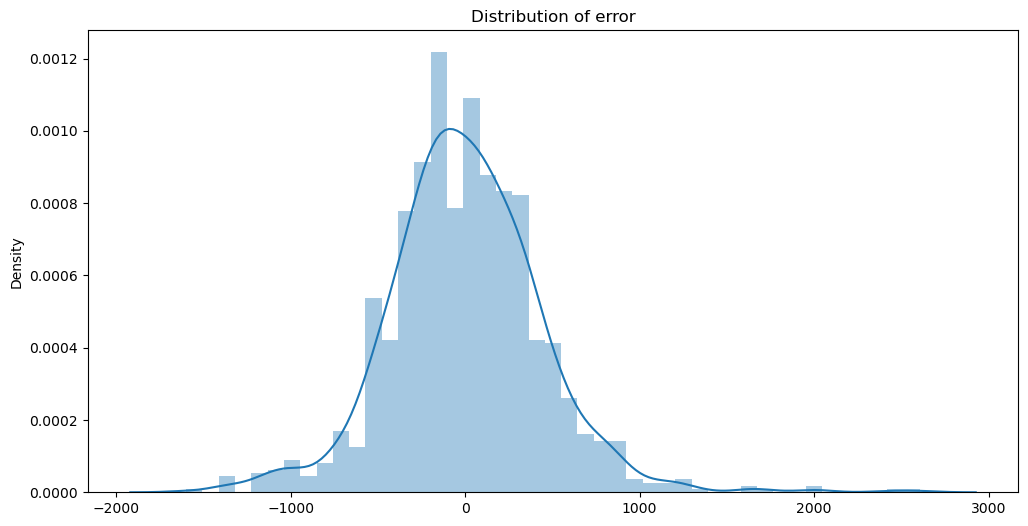

In [201]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fii3.resid)
plt.show()

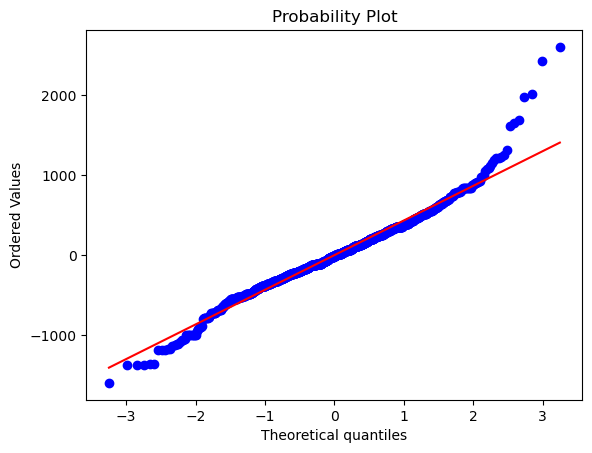

In [202]:
stats.probplot(fii3.resid, dist="norm", plot=pylab)
pylab.show()

##### B-P Test

In [203]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = sms.het_breuschpagan(fii3.resid, fii3.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 30.410586274501803),
 ('p-value', 4.037216003773578e-06),
 ('f-value', 7.7685313897218355),
 ('f p-value', 3.522763588319647e-06)]

### Buiding Linear Regression :

In [199]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,13,14.0,12,14,2813.026521,8,13,8,8
1,13,6.0,12,13,1536.975209,10,13,11,12
2,13,14.0,12,16,2501.129877,15,8,15,8
3,13,6.0,12,13,945.325203,8,8,8,12
4,13,14.0,12,13,2690.161459,15,13,15,13


#### Building Model with all the features :

In [214]:
X = df.drop(['salary_in_usd'],axis=1)
y = df['salary_in_usd']

In [215]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [216]:
rs = StandardScaler()

In [217]:
X_train = pd.DataFrame(rs.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(rs.transform(X_test),columns=X_test.columns)

In [218]:
etr_model = RandomForestRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.03773848, 0.09267927, 0.00972773, 0.16836242, 0.56132794,
       0.01292828, 0.09148323, 0.02575264])

<AxesSubplot:>

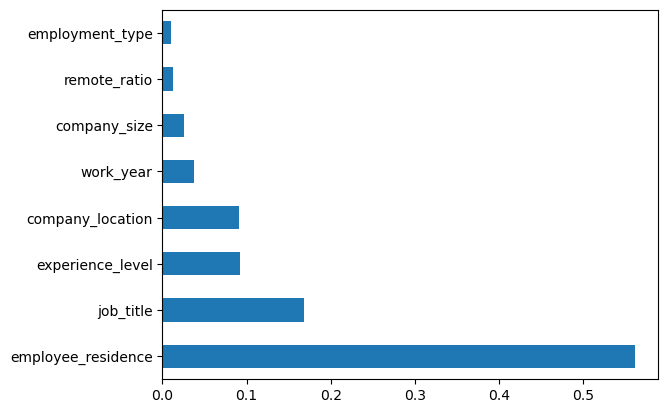

In [219]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [220]:
model = LinearRegression()

In [221]:
model.fit(X_train,y_train)

LinearRegression()

In [222]:
y_pred = model.predict(X_test)

#### R Square Score: Testing

In [223]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.6450087653416893

In [224]:
y_pred = model.predict(X_test)

In [225]:
y_pred_train=model.predict(X_train)

#### R Square Score: Training

In [226]:
r2 = metrics.r2_score(y_train, y_pred_train)
r2

0.6137303601827834

#### RMSLE

In [234]:
rmsle_lr = metrics.mean_squared_log_error(y_test, y_pred)
mse_lr

0.05194306811274026

#### Plot

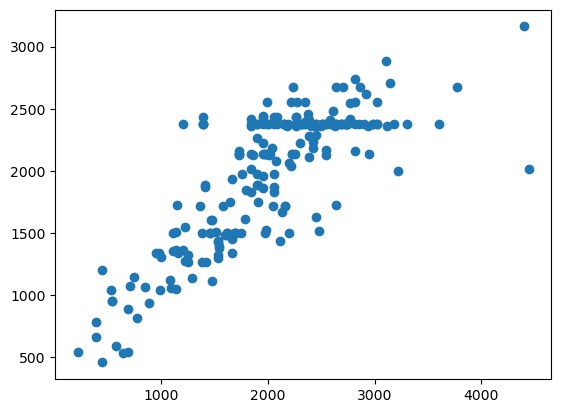

In [235]:
plt.scatter(y_test,y_pred)

#### Building Model with Selected the features : Using Top 4 Features(Selected using feature importance)

In [237]:
X_sel = df.drop(['salary_in_usd','employment_type','remote_ratio','work_year','company_size'],axis=1)
y_sel= df['salary_in_usd']

#### Train_Test Split

In [238]:
X_train_sel,X_test_sel,y_train_sel,y_test_sel = train_test_split(X_sel,y_sel,test_size=0.2,random_state=42)

#### Standardization

In [239]:
rs = StandardScaler()

In [240]:
X_train_sel = pd.DataFrame(rs.fit_transform(X_train_sel),columns=X_train_sel.columns)
X_test_sel = pd.DataFrame(rs.transform(X_test_sel),columns=X_test_sel.columns)

In [241]:
model_sel = LinearRegression()

In [242]:
model_sel.fit(X_train_sel,y_train_sel)

LinearRegression()

In [244]:
y_pred_sel = model_sel.predict(X_test_sel)

#### R square score Testing :

In [245]:
r2_sel = metrics.r2_score(y_test_sel, y_pred_sel)
r2_sel

0.642917366154093

In [248]:
y_pred_sel = model_sel.predict(X_test_sel)

In [249]:
y_pred_train_sel=model_sel.predict(X_train_sel)

#### R square score Training

In [250]:
r2_sel = metrics.r2_score(y_train_sel, y_pred_train_sel)
r2_sel

0.611565547558421

#### RMSLE testing

In [251]:
rmsle_lr_sel = metrics.mean_squared_log_error(y_test_sel, y_pred_sel)
rmsle_lr_sel

0.05227718987424098

#### Plot

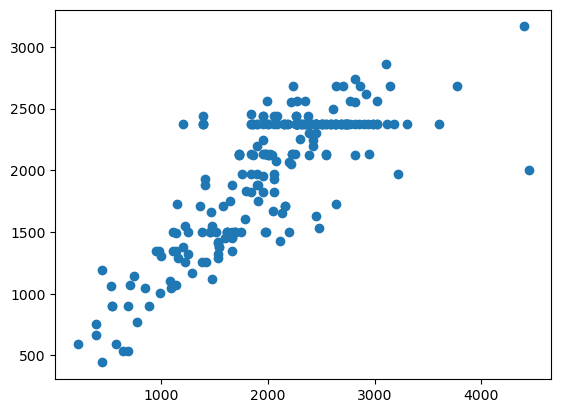

In [252]:
plt.scatter(y_test_sel,y_pred_sel)